# Example 3 - Power Flow

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, VoltageSource
from CircuitCalculator.SimpleCircuit.DiagramSolution import real_network_dc_solution
from CircuitCalculator.Network.NodalAnalysis import nodal_analysis_solver

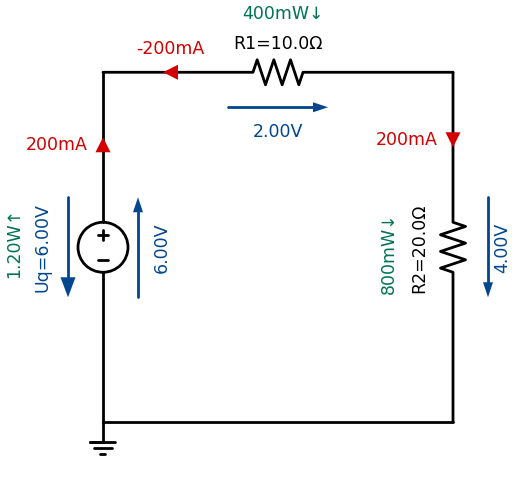

In [2]:

with Schematic(unit=7) as schematic:
    schematic += VoltageSource(V=6, name='Uq', reverse=True).up()
    schematic += Resistor(R=10, name='R1').right()
    schematic += Resistor(R=20, name='R2').down()
    schematic += Line().left()
    schematic += Ground()
    schemdraw_solution = real_network_dc_solution(schematic=schematic, solver=nodal_analysis_solver)
    schematic += schemdraw_solution.draw_voltage('R1')
    schematic += schemdraw_solution.draw_voltage('Uq')
    schematic += schemdraw_solution.draw_current('R1', reverse=True)
    schematic += schemdraw_solution.draw_current('Uq', reverse=True)
    schematic += schemdraw_solution.draw_voltage('R2', reverse=False)
    schematic += schemdraw_solution.draw_current('R2')
    schematic += schemdraw_solution.draw_power('Uq')
    schematic += schemdraw_solution.draw_power('R1')
    schematic += schemdraw_solution.draw_power('R2')